In [24]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import random as rnd
import os
import math

# required for interactive plotting
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets
import numpy.polynomial as np_poly

from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

Rejection Sampling
===================

Overview
---------
Suppose we wish to sample from p(z) and assume that sampling from p(z) is difficult.  
Define a simpler distribution q(z), called *proposal distribution*, from which we can sample readily.  
Introduce a constant *k* such that $kq(z) \ge \tilde{p}(z)$ for all values of z.  

1. Generate a number $z_0$ from q(z).  
1. Generate a number $u_0$ from the uniform distribution [0, $kq(z_0)$]. that is, from the vertical line at $z_0$.  
  1. this pair, $(z_0, u_0)$ has a uniform distribution under kq(z)
1. If $u_0 \gt \tilde(p)(z_0)$, reject the sample, else retain it.

Proof
-----

Original values are generated from the distribution q(z).  
Such samples are accepted with a probability $\tilde{p}(z)) / kq(z)$  

Hence the probability that the sample will be accepted is given by  
\begin{array}{llr}
p(\text{accept})
&=
\int \left\{ \frac{\tilde{p}(z)}{kq(z)} \right\} q(z) dz
\\ &=
\frac{1}{k} \int \tilde{p}(z) dz 
\end{array}

Illustration
---------------

Consider the [gamma distribution](/notebooks/all-of-statistics/2-random-variables.ipynb#Gamma-distribution),
$$
\text{Gam}(z \mid a,b)
=
\frac{b^a ~z^{a-1}\exp(-bz)}{\Gamma(a)}
$$

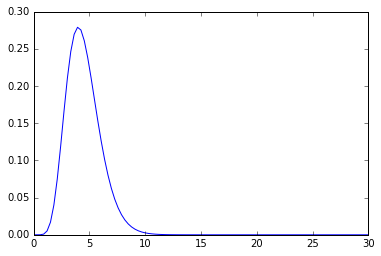

In [78]:
def compute_gamma(z, a, b):
    #nr = (b**a) * (z**(a-1)) * (math.e**(-b*z))
    z = max(10e-5, z)
    log_nr = a*math.log(b) + (a-1)*math.log(z) - (b*z)
    nr = math.e**log_nr
    dr = math.gamma(a)
    return nr / dr

def compute_gamma_all(x, a=24, b=2):
    return [compute_gamma(xx, a, b) for xx in x]
    
def show_gamma(a=24, b=2, x_max=30):
    x = np.linspace(1e-5, x_max, 100)
    y = compute_gamma_all(x,a,b)
    plt.plot(x, y)
    plt.show()

# as alpha increases, the hill moves to the right and 
# also, the peak becomes short => the spread increases
# as beta increases, the hill slides to the left and
# the peak goes up
# alpha and beta have the opposite effects
interact(show_gamma, a=(1,100), b=(1, 50), x_max=(0,100))

Cauchy distribution
-------------------

$$
p(x ; x_0, \gamma)
=
\left(
   \pi \gamma
   \left[
     1+
      \left(
        \frac{x-x_0}{\gamma}
      \right)^2
    \right]
\right)^{-1}
$$

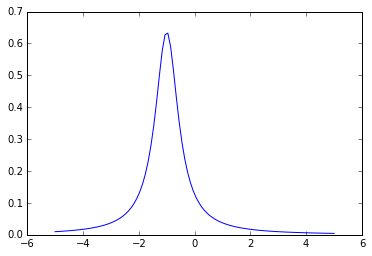

In [23]:
def compute_cauchy(x, x0, gamma):
    term1 = math.pi * gamma
    term2 = 1 + ((x-x0)/gamma)**2
    return 1./(term1 * term2)

def compute_cauchy_all(x, x0, gamma):
    return [compute_cauchy(xx, x0, gamma) for xx in x]

def show_cauchy(gamma=0.5, x0=0, x_max=5):
    x = np.linspace(-x_max, x_max, 100)
    y = compute_cauchy_all(x, x0, gamma)
    plt.plot(x, y)
    plt.show()

# as alpha increases, the hill moves to the right and 
# also, the peak becomes short => the spread increases
# as beta increases, the hill slides to the left and
# the peak goes up
# alpha and beta have the opposite effects
interact(show_cauchy, gamma=(0,5,0.1), x0=(-5, 5), x_max=(0,100))

CDF of Cauchy is

$$
y
=
\frac{1}{\pi}
\arctan \left( \frac{x-x_0}{\gamma} \right)
+
\frac{1}{2}
$$
Note that $y \in [0,1]$

Then,
$$
x = \gamma \tan(\pi(y-0.5)) + x_0
$$

Assume $\gamma = 1, x_0 = 0$  
Then
$$
z = \tan \left(\pi(y - 0.5)\right)
$$

k: 17.0799701599
{'x0': 24, 'gamma': 6.855654600401044}


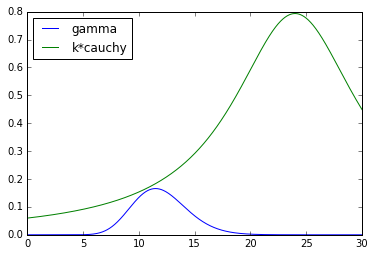

In [82]:
pmtrs_gamma = {'a': 24, 'b': 2}
pmtrs_cauchy = {'x0': pmtrs_gamma['a'],
                'gamma': math.sqrt(2*pmtrs_gamma['a']-1)}

x0, gamma = pmtrs_cauchy['x0'], pmtrs_cauchy['gamma']

x_range = np.linspace(1e-5,30,1000)
y_gamma = compute_gamma_all(x_range, pmtrs_gamma['a'], pmtrs_gamma['b'])
y_cauchy = compute_cauchy_all(x_range, x0, gamma)

# finding k
ratios = np.divide(y_gamma, y_cauchy)
k = max(ratios)+1.
print('k:', k)

# values of cauchy's cdf
y = [rnd.random() for _ in range(100)]

for yy in y:
    # value of z such that cauchy_pdf(z)==y
    z = gamma * math.tan(math.pi * (yy-0.5)) + x0
    q_z = compute_cauchy(z, x0, gamma)
    k_q_z = k * q_z

    # find u_0 in ([0, kq(z_0)])
    u0 = rnd.random()*k_q_z
    p_z = compute_gamma(z, pmtrs_gamma['a'], pmtrs_gamma['b'])
    
    if (p_z > k_q_z):
        print('fucked z: {0}, p_z: {1}'
              ',q_z: {2} k_q_z: {3}'.format(z, p_z, q_z, k_q_z ))
        break
print(pmtrs_cauchy)
y_cauchy_k = [k*yy_cauchy for yy_cauchy in y_cauchy]
plt.plot(x_range, y_gamma, label='gamma')
plt.plot(x_range, y_cauchy_k, label='k*cauchy')
plt.legend(loc='upper left')
plt.show()